In [1]:
# Custom libraries
from datascienceutils import plotter
from datascienceutils import analyze

# Standard libraries
import json
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
import random

from sklearn import cross_validation
from sklearn import metrics

from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
from bokeh.charts import Histogram
import bokeh
output_notebook(bokeh.resources.INLINE)

from sqlalchemy import create_engine

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Loading BokehJS ...

In [4]:
titDf=pd.read_excel('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls')

In [5]:
titDf.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
titDf.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
titDf.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [18]:
# Numerical values fillna
titDf['pclass'].fillna(value=0,axis=0, inplace=True)
titDf['survived'].fillna(999999,axis=0, inplace=True)
titDf['age'].fillna(0, axis=0, inplace=True)
titDf['sibsp'].fillna(999999,axis=0, inplace=True)
titDf['parch'].fillna(999999,axis=0, inplace=True)
titDf['fare'].fillna(0, axis=0,inplace=True)
titDf['body'].fillna(999999, axis=0, inplace=True)

# Categorical values fillna
titDf['sex'].fillna('NA', inplace=True)
titDf['name'].fillna('NA', inplace=True)
titDf['cabin'].fillna('NA', inplace=True)
titDf['home.dest'].fillna('NA', inplace=True)
titDf['embarked'].fillna('NA', inplace=True)


In [19]:
analyze.correlation_analyze(titDf, categories=['pclass','survived', 'embarked', 'sex'], 
                                measure=['age','fare', 'ticket'])

# Correlation btw Numerical Columns
# Correlation btw Columns pclass & survived by measure age
# Correlation btw Columns pclass & embarked by measure age
# Correlation btw Columns pclass & sex by measure age
# Correlation btw Columns survived & embarked by measure age
# Correlation btw Columns survived & sex by measure age
# Correlation btw Columns embarked & sex by measure age
# Correlation btw Columns pclass & survived by measure fare
# Correlation btw Columns pclass & embarked by measure fare
# Correlation btw Columns pclass & sex by measure fare
# Correlation btw Columns survived & embarked by measure fare
# Correlation btw Columns survived & sex by measure fare
# Correlation btw Columns embarked & sex by measure fare
# Correlation btw Columns pclass & survived by measure ticket
# Correlation btw Columns pclass & embarked by measure ticket
# Correlation btw Columns pclass & sex by measure ticket
# Correlation btw Columns survived & embarked by measure ticket
# Correlation btw Colum

# Pandas correlation coefficients matrix
            pclass  survived       age     sibsp     parch      fare      body
pclass    1.000000 -0.312469 -0.410068  0.060832  0.018322 -0.558803  0.049381
survived -0.312469  1.000000  0.036601 -0.027825  0.082660  0.244556  0.250897
age      -0.410068  0.036601  1.000000 -0.134465 -0.039940  0.213497 -0.219715
sibsp     0.060832 -0.027825 -0.134465  1.000000  0.373587  0.160434  0.046507
parch     0.018322  0.082660 -0.039940  0.373587  1.000000  0.221706  0.038375
fare     -0.558803  0.244556  0.213497  0.160434  0.221706  1.000000  0.009262
body      0.049381  0.250897 -0.219715  0.046507  0.038375  0.009262  1.000000
# Pandas co-variance coefficients matrix
                pclass      survived           age         sibsp        parch  \
pclass        0.701969     -0.127248 -6.043683e+00      0.053090     0.013287   
survived     -0.127248      0.236250  3.129404e-01     -0.014088     0.034776   
age          -6.043683      0.312940  3.094

## So no correlation.. not surprising since most of the numerical variables are just categorical variables encoded. 

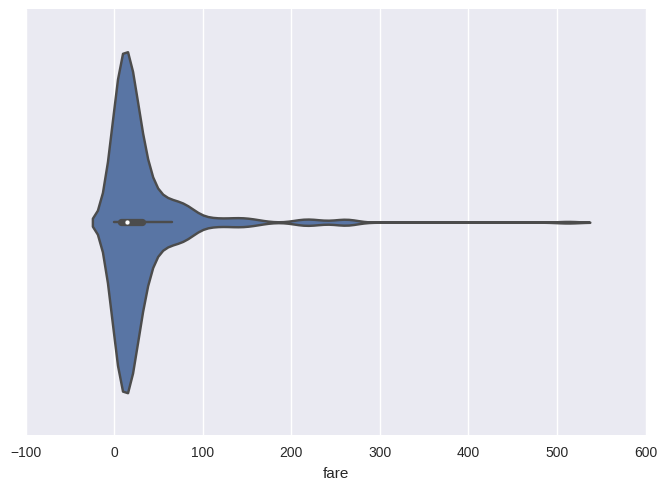

In [21]:
analyze.dist_analyze(titDf, 'fare')

## Ah.. no point doing regression on this dataset.. Let's see if we can find clusters.

In [24]:
titDf.groupby(['sex', 'survived', 'embarked']).count()

pclass  name  age  sibsp  parch  ticket  fare  \
sex    survived embarked                                                  
female 0        C             11    11   11     11     11      11    11   
                Q             23    23   23     23     23      23    23   
                S             93    93   93     93     93      93    93   
       1        C            102   102  102    102    102     102   102   
                NA             2     2    2      2      2       2     2   
                Q             37    37   37     37     37      37    37   
                S            198   198  198    198    198     198   198   
male   0        C            109   109  109    109    109     109   109   
                Q             56    56   56     56     56      56    56   
                S            517   517  517    517    517     517   517   
       1        C             48    48   48     48     48      48    48   
                Q              7     7    7      7      7       7     7   
                S            106   106  106    106    106     106   106   

                          cabin  boat  body  home.dest  
sex    survived embarked                                
female 0        C            11     0    11         11  
                Q            23     0    23         23  
                S            93     1    93         93  
       1        C           102    98   102        102  
                NA            2     2     2          2  
                Q            37    33    37         37  
                S           198   185   198        198  
male   0        C           109     3   109        109  
                Q            56     0    56         56  
                S           517     5   517        517  
       1        C            48    48    48         48  
                Q             7     5     7          7  
                S           106   106   106        106

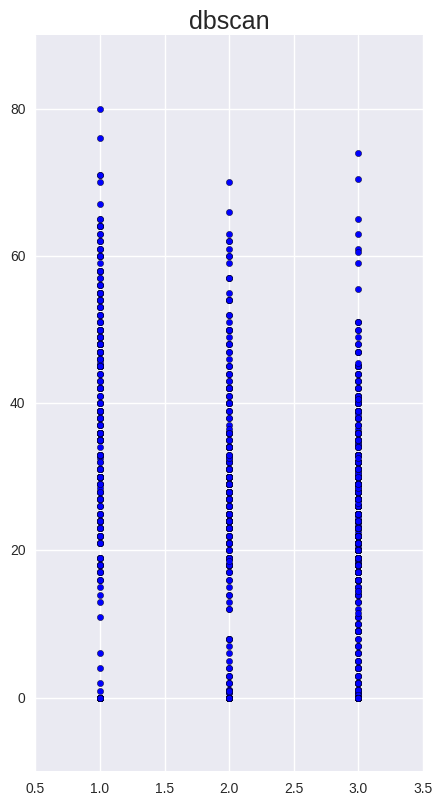

In [49]:
newDf = titDf.copy(deep=True)
newDf.drop(['cabin', 'sex', 'survived','embarked', 'name', 'home.dest', 'ticket', 'boat'],1, inplace=True)
analyze.cluster_analyze(newDf, cluster_type='dbscan')

For clusters = 2 The average silhouette_score is : 0.999941420053


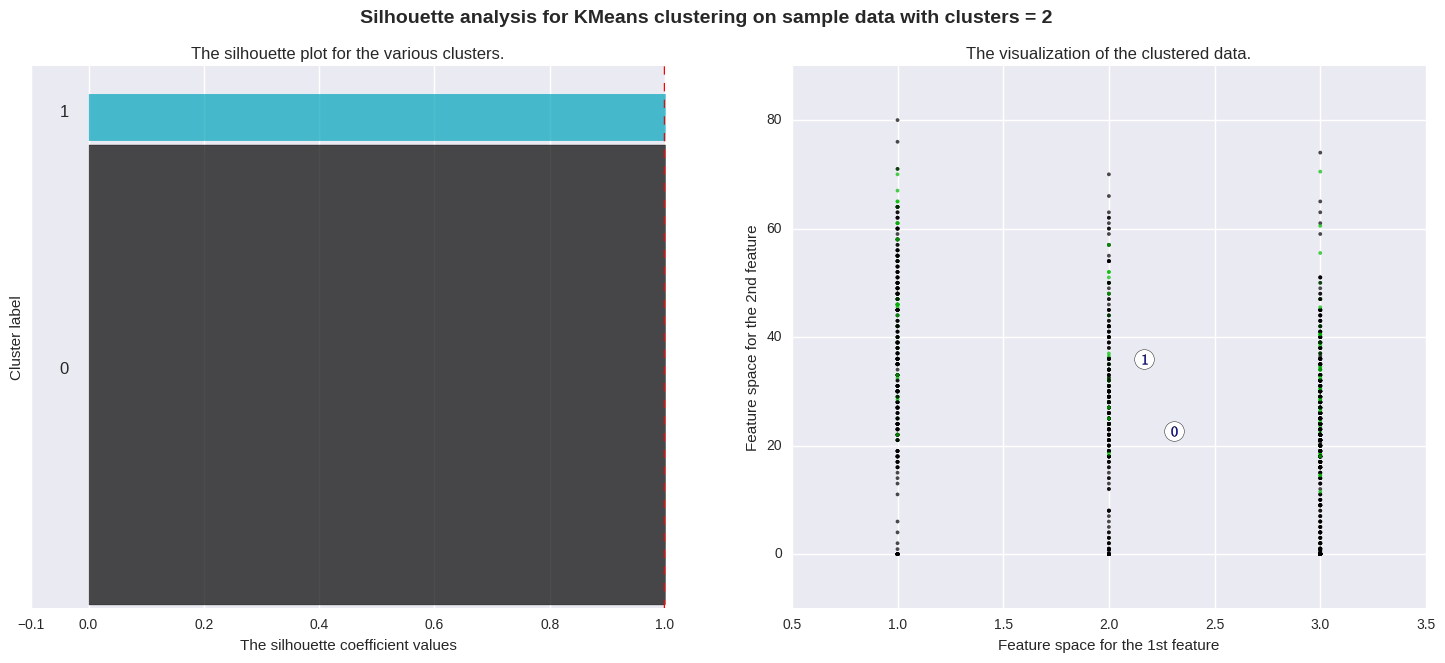

For clusters = 4 The average silhouette_score is : 0.763323770381


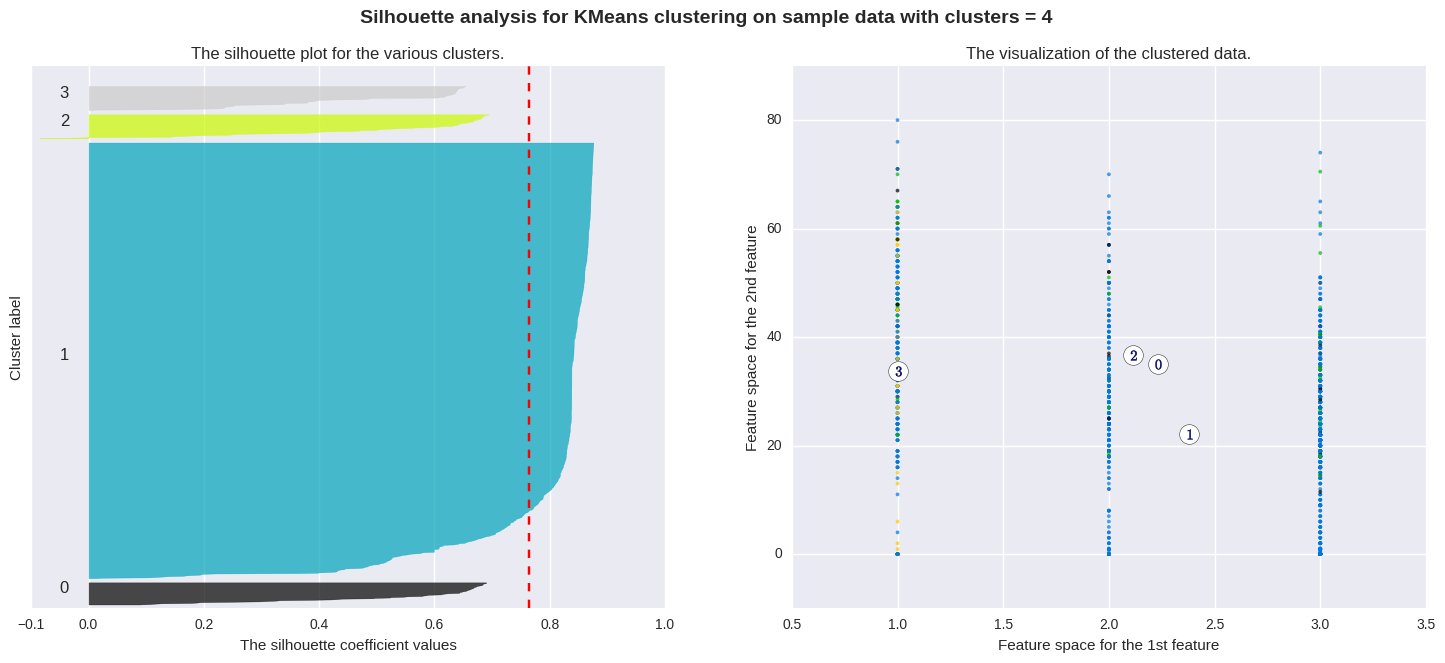

For clusters = 6 The average silhouette_score is : 0.585028381982


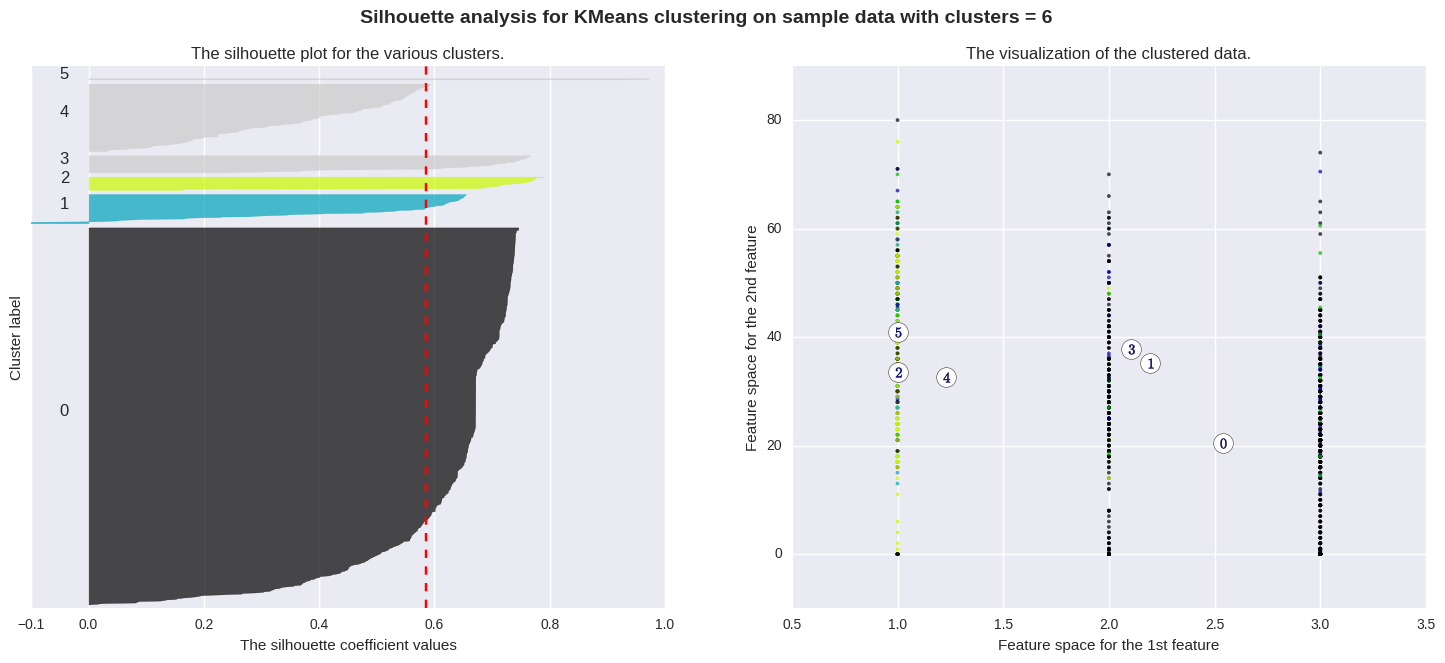

In [50]:
analyze.silhouette_analyze(newDf, cluster_type='KMeans')
#newDf['pclass'].unique()
#newDf.age.unique()
#newDf.sibsp.unique()
#newDf.parch.unique()
#newDf.boat.unique()
#newDf.body.unique()

## Hmm.. according to K-Means there's no cluster... Let's try spectral

/home/anand/anaconda3/envs/analytics/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For clusters = 2 The average silhouette_score is : -0.754123460709


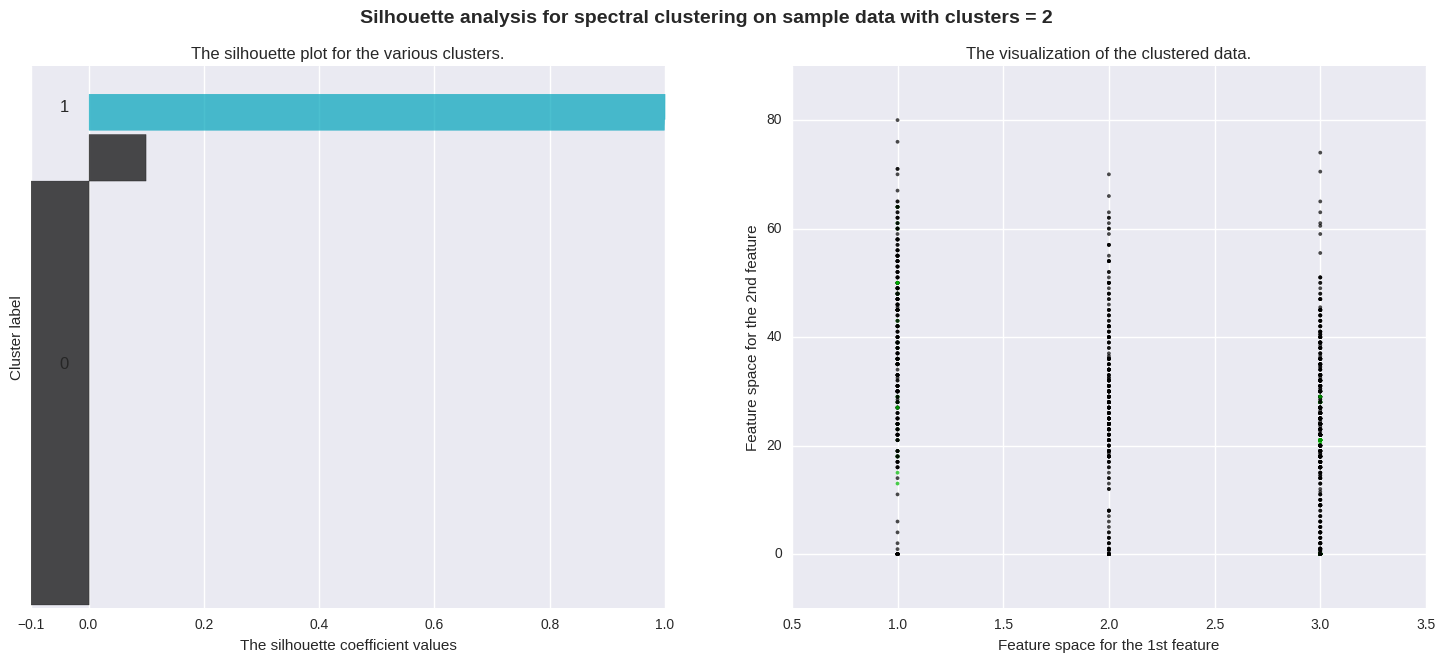

For clusters = 4 The average silhouette_score is : -0.732695925496


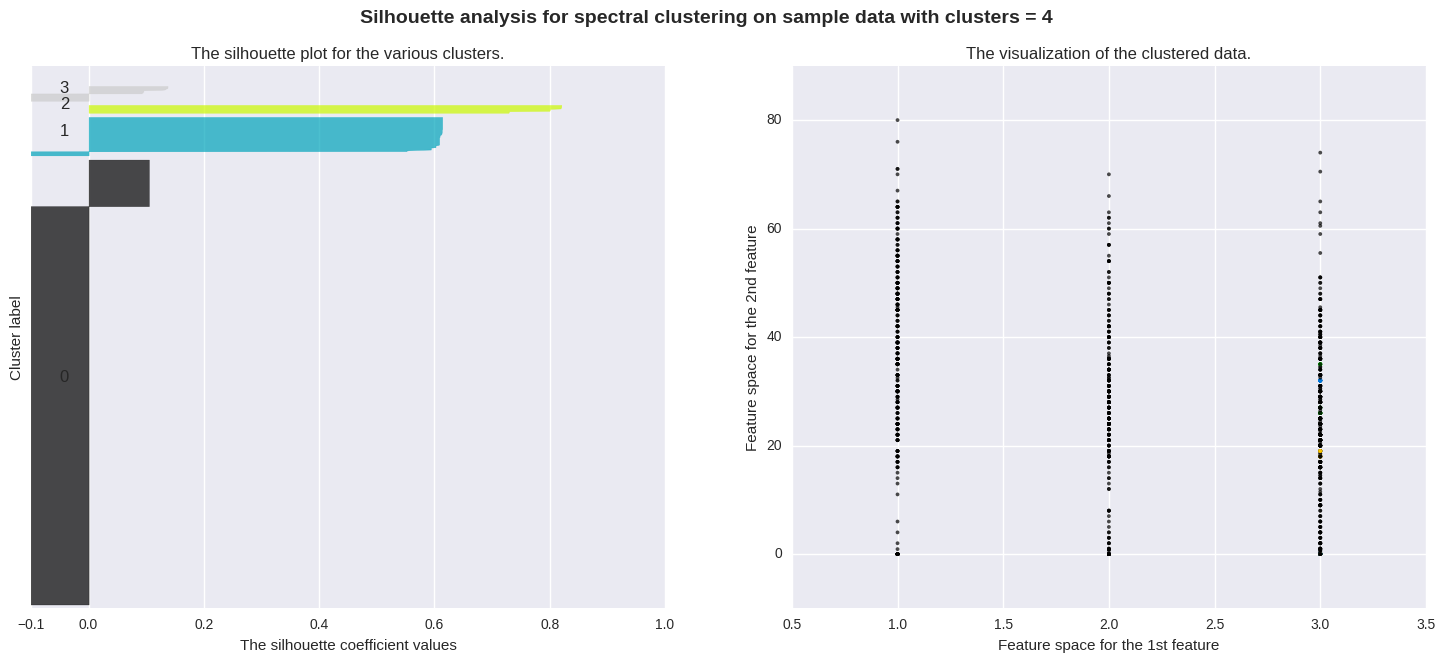

For clusters = 6 The average silhouette_score is : -0.666164148375


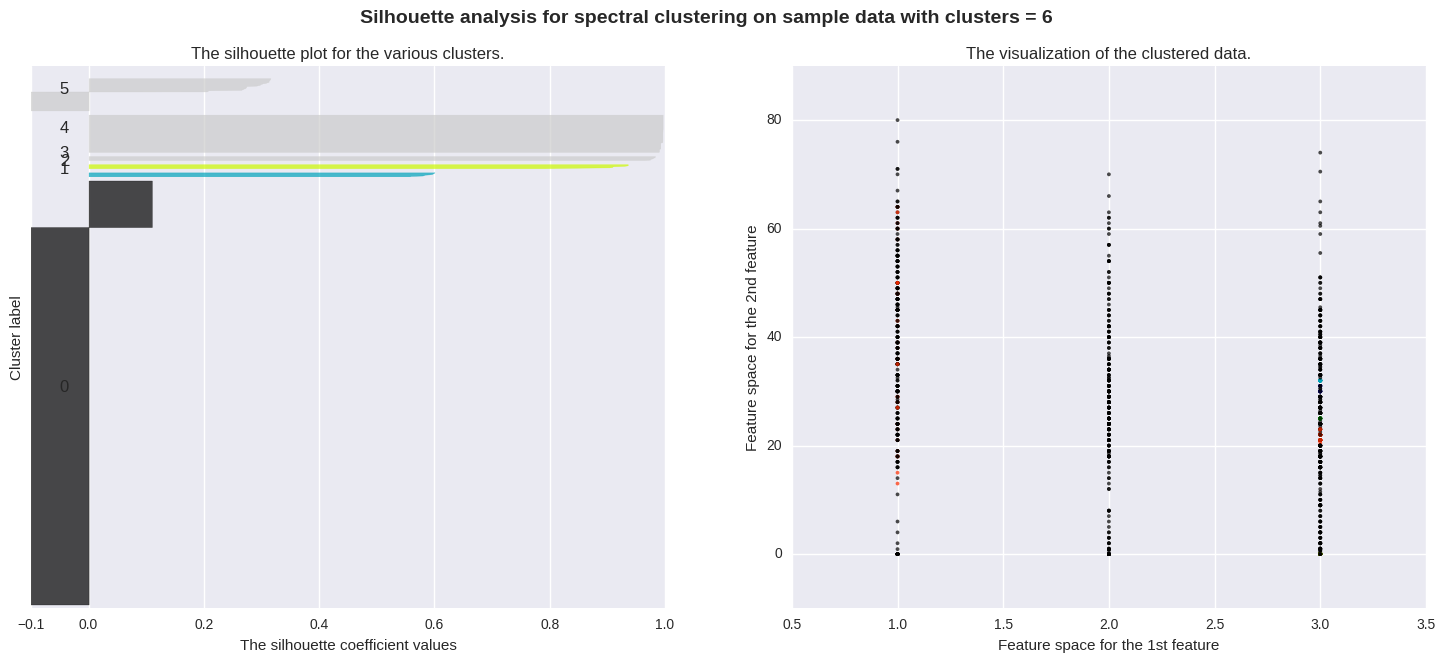

In [51]:
analyze.silhouette_analyze(newDf, cluster_type='spectral')